In [ ]:
# @title Importando do Drive

# Importando direto do Drive
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/train_test_dataset_Fault Impact Analysis (1)/'

!ls

In [2]:
# @title Bibliotecas
import pandas as pd
import os
import numpy as np
import glob

In [ ]:
# @title Juntando os arquivos .csv
combined_data = []

#i = 0

for f in os.listdir():
    if f.endswith('.csv'):
        #i += 1
        df = pd.read_csv(f)
        combined_data.append(df)
        combined_df = pd.concat(combined_data, ignore_index=True)

print(combined_df)

## Gerando lista

In [9]:
import pandas as pd
import glob

dados = {}

caminho_csv = '/content/drive/My Drive/train_test_dataset_Fault Impact Analysis (1)/*.csv'

arquivos_csv = glob.glob(caminho_csv)[:10]  # primeiros 10 arquivos

for count, arquivo_csv in enumerate(arquivos_csv, start=1):
    df = pd.read_csv(arquivo_csv)

    chave = count  # Usando apenas o número do arquivo como chave inteira
    dados[chave] = df.iloc[:, 3].tolist()

dados

{1: [11.290425531914892, 17.35531914893617],
 2: [9.274468085106385,
  8.158510638297873,
  6.75744680851064,
  4.640425531914893,
  4.036170212765958,
  19.664893617021274,
  9.415957446808513,
  21.10106382978724,
  18.69680851063829,
  22.575531914893617],
 3: [0.943, 0.976, 0.0, 5.731, 0.0, 11.551],
 4: [66.06170212765957,
  44.38829787234042,
  28.388297872340424,
  27.16382978723404,
  25.68085106382979,
  28.07127659574468,
  27.018085106382976,
  29.94787234042553,
  32.768085106382976,
  30.98723404255319,
  46.381914893617015,
  35.58510638297873,
  50.06702127659575,
  46.35425531914893,
  34.52659574468085,
  42.53829787234042,
  49.19468085106383,
  62.310638297872345,
  56.5063829787234,
  67.91063829787234,
  67.86489361702127,
  59.84787234042553,
  63.843617021276586,
  52.09468085106384,
  44.02340425531915,
  45.47446808510639,
  21.52659574468085,
  18.74574468085106,
  11.325531914893618,
  14.16063829787234,
  11.55531914893617,
  25.969148936170217,
  33.27978723

In [10]:
df_sem_gaps = combined_df.dropna()

# Exibir o DataFrame resultante
print("DataFrame sem linhas com gaps:")
print(df_sem_gaps)

DataFrame sem linhas com gaps:
           NE ID              endTime  access_success_rate  \
0       B0433-12  2023-02-23 09:00:00           100.000000   
1       B0433-12  2023-02-23 10:00:00            99.959100   
2       B0433-12  2023-02-22 02:00:00           100.000000   
3       B0433-12  2023-02-22 03:00:00            99.917898   
4       B0433-12  2023-02-22 04:00:00           100.000000   
...          ...                  ...                  ...   
241183  B0433-12  2023-02-16 06:00:00           100.000000   
241184  B0433-12  2023-02-16 07:00:00           100.000000   
241185  B0433-12  2023-02-16 08:00:00           100.000000   
241186  B0433-12  2023-02-16 09:00:00           100.000000   
241187  B0433-12  2023-02-16 10:00:00           100.000000   

        resource_utilition_rate        TA       bler        cqi        mcs  \
0                     11.290426  1.387211  10.284418   9.033579  13.483704   
1                     17.355319  1.334445  10.488714   8.518196  10.

In [ ]:
# @title Identificando os valores de falha junto com a coluna "Anomaly"

df_sem_gaps = combined_df.dropna()

df_sem_gaps['isAnomaly'] = np.where(df_sem_gaps['relation'] != 0, 1, 0)

anomaly = df_sem_gaps[df_sem_gaps['isAnomaly'] == 1 ]

anomalies_df = df_sem_gaps.drop(index=0, columns = ['access_success_rate'])


print(anomalies_df)


In [13]:
# @title Valores de média dos dados apresentados
anomalies_df

,NE ID,endTime,resource_utilition_rate,TA,bler,cqi,mcs,data_rate,fault_duration,relation,isAnomaly
1,B0433-12,2023-02-23 10:00:00,17.355319,1.334445,10.488714,8.518196,10.355348,26.045836,55.0,0.941278,1
2,B0433-12,2023-02-22 02:00:00,9.274468,1.334357,7.766956,9.936271,9.685477,34.893030,0.0,0.000000,0
3,B0433-12,2023-02-22 03:00:00,8.158511,1.413097,8.098518,9.731196,9.799134,35.295274,0.0,0.000000,0
4,B0433-12,2023-02-22 04:00:00,6.757447,1.383739,7.753734,10.477991,9.237185,37.192838,0.0,0.000000,0
5,B0433-12,2023-02-22 05:00:00,4.640426,1.427719,5.284336,10.103315,6.039263,40.846762,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
241183,B0433-12,2023-02-16 06:00:00,6.832979,1.292625,8.088514,8.467575,9.170255,37.296643,0.0,0.000000,0
241184,B0433-12,2023-02-16 07:00:00,9.026596,1.353621,8.269148,7.974969,8.833573,30.579446,0.0,0.000000,0
241185,B0433-12,2023-02-16 08:00:00,8.760638,1.334424,8.383369,8.410293,9.179441,31.962847,0.0,0.000000,0
241186,B0433-12,2023-02-16 09:00:00,14.923404,1.416980,10.256046,8.437328,9.375335,23.928391,216.0,0.941278,1


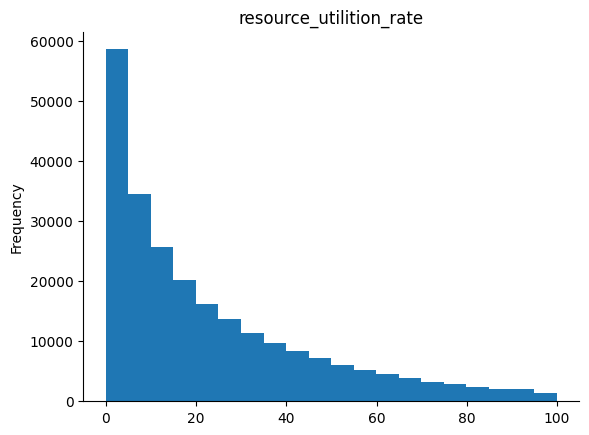

In [14]:
from matplotlib import pyplot as plt
anomalies_df['resource_utilition_rate'].plot(kind='hist', bins=20, title='resource_utilition_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

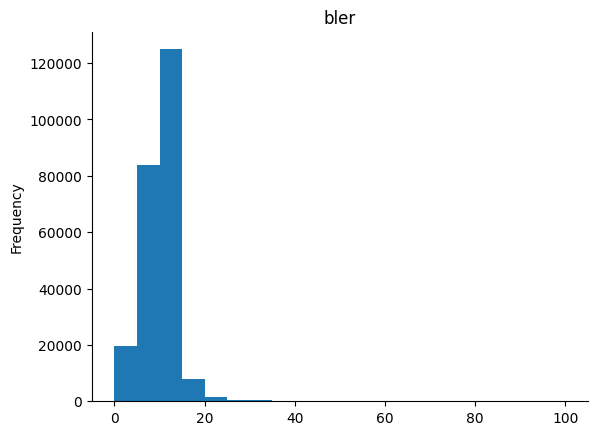

In [15]:
from matplotlib import pyplot as plt
anomalies_df['bler'].plot(kind='hist', bins=20, title='bler')
plt.gca().spines[['top', 'right',]].set_visible(False)

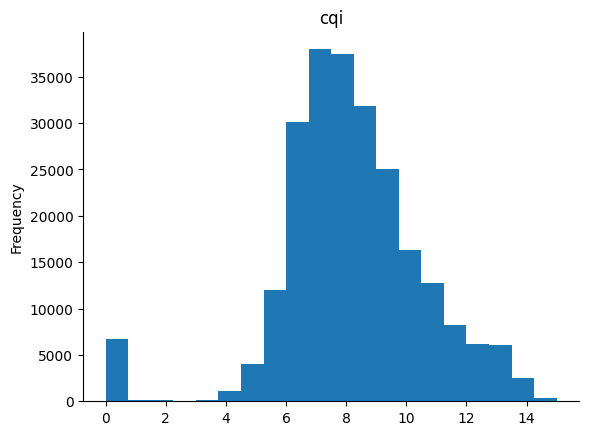

In [ ]:
from matplotlib import pyplot as plt
anomalies_df['cqi'].plot(kind='hist', bins=20, title='cqi')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Levantando métricas de mediana dos dados apresentados

In [16]:
anomalies_df.median()

<ipython-input-16-9d1ed8aaf0f4>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anomalies_df.median()


resource_utilition_rate    15.145826
TA                          1.605545
bler                       10.418401
cqi                         8.043306
mcs                         8.556961
data_rate                  12.875670
fault_duration              0.000000
relation                    0.000000
isAnomaly                   0.000000
dtype: float64

In [24]:
# @title Normalizando Dados

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def normalize_dataframe(df_sem_gaps):
    numeric_columns = df_sem_gaps.select_dtypes(include=['float64', 'int64']).columns

    scaler = MinMaxScaler()
    df_sem_gaps[numeric_columns] = scaler.fit_transform(df_sem_gaps[numeric_columns])

    return df_sem_gaps

# Ex1

if __name__ == "__main__":

    df_normalizado = normalize_dataframe(df_sem_gaps)

    print(df_normalizado.head())


      NE ID              endTime  access_success_rate  \
0  B0433-12  2023-02-23 09:00:00             1.000000   
1  B0433-12  2023-02-23 10:00:00             0.999591   
2  B0433-12  2023-02-22 02:00:00             1.000000   
3  B0433-12  2023-02-22 03:00:00             0.999179   
4  B0433-12  2023-02-22 04:00:00             1.000000   

   resource_utilition_rate        TA      bler       cqi       mcs  data_rate  \
0                 0.113020  0.198173  0.102844  0.602239  0.503226   0.099360   
1                 0.173731  0.190635  0.104887  0.567880  0.386472   0.071156   
2                 0.092839  0.190622  0.077670  0.662418  0.361472   0.095325   
3                 0.081669  0.201871  0.080985  0.648746  0.365714   0.096424   
4                 0.067644  0.197677  0.077537  0.698533  0.344741   0.101608   

   fault_duration  relation  
0        0.000000  0.880123  
1        0.015278  0.992961  
2        0.000000  0.880123  
3        0.000000  0.880123  
4        0.000000  0

<ipython-input-24-a081554f2af2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_gaps[numeric_columns] = scaler.fit_transform(df_sem_gaps[numeric_columns])


<ipython-input-25-e1c621c0a8ff>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = df_normalizado.corr()


<Axes: >

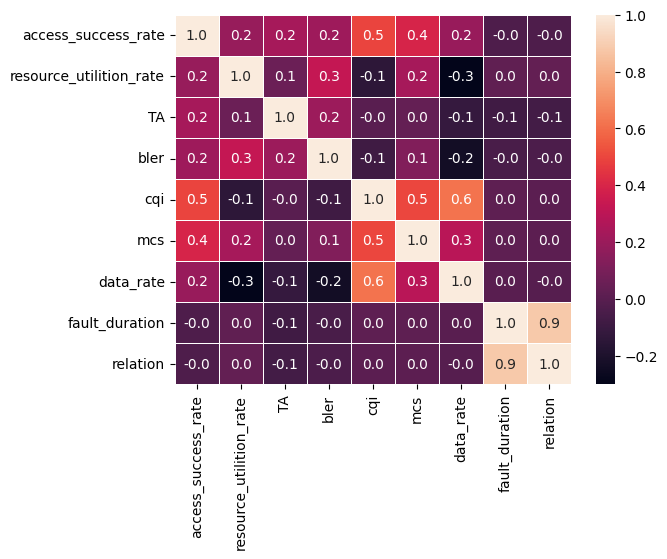

In [25]:
# @title Matriz 1
import pandas as pd
import seaborn as sn

corrM = df_normalizado.corr()

plot = sn.heatmap(corrM, annot = True, fmt=".1f", linewidths=.6)

plot


<ipython-input-26-93dedb3e98cb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = df_normalizado.corr(method = "kendall")


<Axes: >

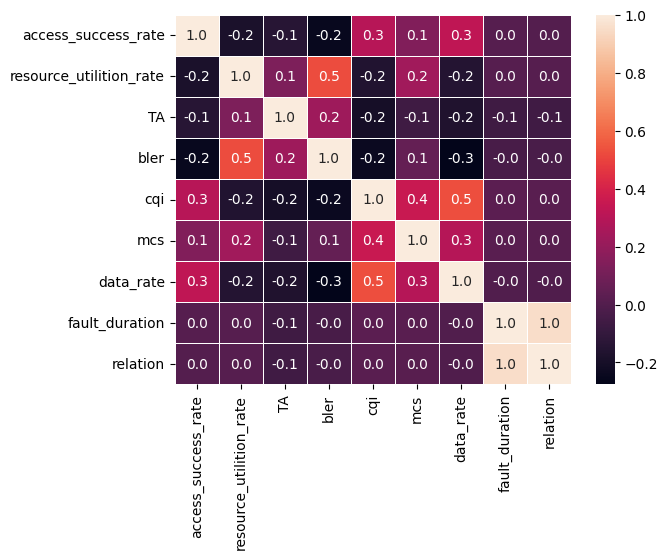

In [26]:
# @title Matriz 2
import pandas as pd
import seaborn as sn

corrM = df_normalizado.corr(method = "kendall")

plot = sn.heatmap(corrM, annot = True, fmt=".1f", linewidths=.6)

plot


<ipython-input-27-ecd810293344>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = df_normalizado.corr(method = "spearman")


<Axes: >

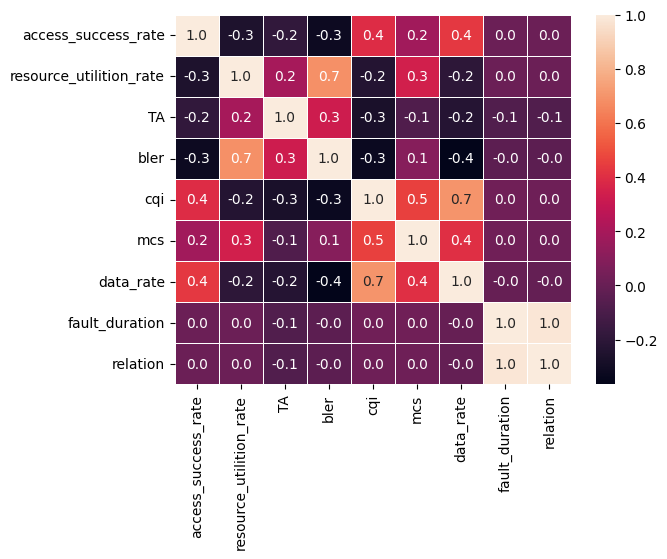

In [27]:
# @title Matriz 3
import pandas as pd
import seaborn as sn

corrM = df_normalizado.corr(method = "spearman")

plot = sn.heatmap(corrM, annot = True, fmt=".1f", linewidths=.6)

plot

<Axes: xlabel='bler', ylabel='cqi'>

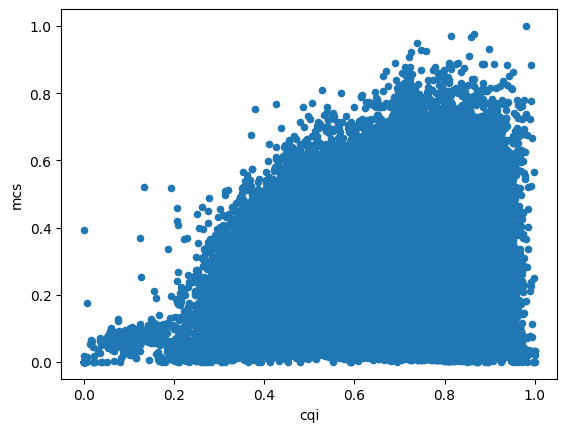

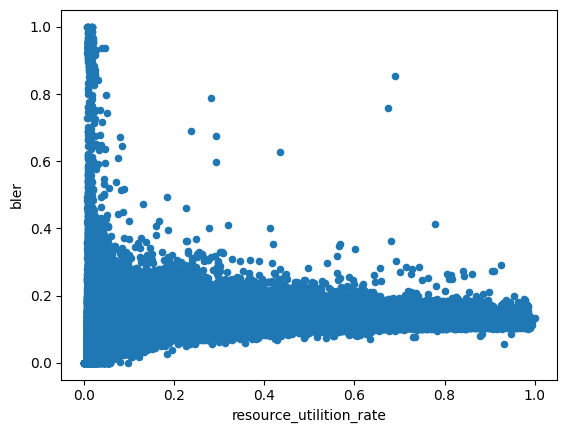

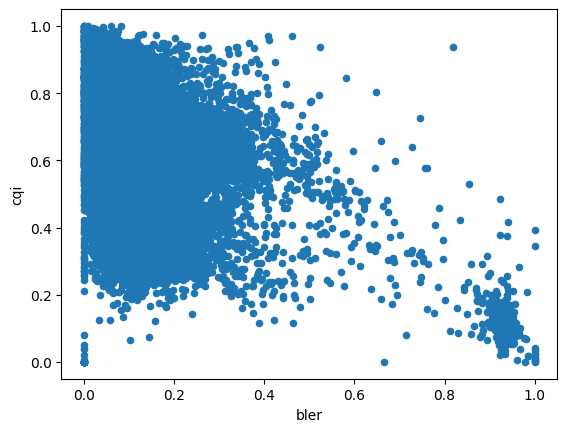

In [28]:
df_normalizado.plot(x="cqi", y= "mcs", kind="scatter")
df_normalizado.plot(x="resource_utilition_rate", y= "bler", kind="scatter")
df_normalizado.plot(x="bler", y= "cqi", kind="scatter")

In [29]:
from scipy import stats
from scipy.stats import spearmanr

corr, p_value = spearmanr(df_normalizado['resource_utilition_rate'], df_normalizado['bler'])

print(f'coeficiente de correlação de Spearman: {corr}')
print(f'Valor p: {p_value}')

collumns_bler = 'bler'
collumns_ru = 'resource_utilition_rate'
collumns_mcs = 'mcs'
collumns_cqi = 'cqi'
collumns_ta = "TA"
collumns_data_rate = "data_rate"


alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0 - há evidências de diferença significativa.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula.")


coeficiente de correlação de Spearman: 0.688105307669613
Valor p: 0.0
Rejeitar H0 - há evidências de diferença significativa.


In [31]:
import pandas as pd
from itertools import combinations
from scipy.stats import kendalltau

colunas = df_normalizado.columns
pares_colunas = list(combinations(colunas, 2))

# coeficiente de correlação de Kendall
for coluna1, coluna2 in pares_colunas:
    corr, _ = kendalltau(df_normalizado[coluna1], df_normalizado[coluna2])
    print(f"Correlação entre {coluna1} e {coluna2}: {corr}")


Correlação entre NE ID e endTime: -0.02215921673765656
Correlação entre NE ID e access_success_rate: -0.03666316593360785
Correlação entre NE ID e resource_utilition_rate: -2.6987196882855794e-05
Correlação entre NE ID e TA: 0.16437052631043025
Correlação entre NE ID e bler: 0.02116238622665327
Correlação entre NE ID e cqi: -0.0015763361057673675
Correlação entre NE ID e mcs: -0.016052742904864185
Correlação entre NE ID e data_rate: -0.0123217992641962
Correlação entre NE ID e fault_duration: 0.07589710820046418
Correlação entre NE ID e relation: 0.07070811772845453
Correlação entre endTime e access_success_rate: -0.00033504404251685066
Correlação entre endTime e resource_utilition_rate: -0.004544841754996982
Correlação entre endTime e TA: -0.027259186112880075
Correlação entre endTime e bler: -0.01069301560742619
Correlação entre endTime e cqi: -0.002374823463137465
Correlação entre endTime e mcs: -0.005198599928709408
Correlação entre endTime e data_rate: -0.00530423784819836
Correla

In [32]:
from itertools import combinations
from scipy.stats import kendalltau
from tabulate import tabulate

colunas = df_normalizado.columns
pares_colunas = list(combinations(colunas, 2))

results = []

for coluna1, coluna2 in pares_colunas:
    corr, _ = kendalltau(df_normalizado[coluna1], df_normalizado[coluna2])
    results.append([coluna1, coluna2, corr])

results_ordenados = sorted(results, key=lambda x: x[2])

tab = tabulate(results_ordenados, headers=['Coluna 1', 'Coluna 2', 'Correlação'], tablefmt='grid')

print(tab)

+-------------------------+-------------------------+--------------+
| Coluna 1                | Coluna 2                |   Correlação |
+=========================+=========================+==============+
| bler                    | data_rate               | -0.275778    |
+-------------------------+-------------------------+--------------+
| access_success_rate     | bler                    | -0.249156    |
+-------------------------+-------------------------+--------------+
| bler                    | cqi                     | -0.239537    |
+-------------------------+-------------------------+--------------+
| TA                      | cqi                     | -0.203267    |
+-------------------------+-------------------------+--------------+
| access_success_rate     | resource_utilition_rate | -0.181981    |
+-------------------------+-------------------------+--------------+
| TA                      | data_rate               | -0.167537    |
+-------------------------+-------